In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

house_df = pd.read_csv('kc_house_data.csv')

## 1. Linear Regression. A bit of formalism

Let's have a data consisting of $n$ samples. These samples are $(m+1)$ - dimensional vectors, where first $m$ dimensions are called features (explanatory variables) and will be used to predict the last dimension which is called regressand (dependent variable). 

We will have therefore a $n \times m$ matrix **$X$** (called feature matrix) and vector **$y$** of lenght $n$. 

In our simple example, living squarefeet is a feature, house's price is regressand and the data consists of $100$ samples. It forms $100 \times 1$ feature matrix **$X$** and vector **$y$** of length $100$.

In [38]:
X = house_df.sqft_living.values.reshape(-1,1)[:100]
y = house_df.price.values.reshape(-1,1)[:100]
print(np.shape(X))
print(np.shape(y))

(100, 1)
(100, 1)


Linear regression approach tries to find a vector **$b$** which minimizes the cost function 

$$f_{y}(b) = \dfrac{|Xb - y|^2}{n}, $$

where **$|\cdot|$** is euclidean norm and **$Xb$** is simple matrix multiplication (vector is also a matrix). 

Geometrically (and roughly) speaking, we are determining a line which minimizes the cumulative distance to all the points. 

When such a vector **$b$** is found, we can predict values **$y$** for given features **$X$** by calculating **$Xb$**. We have therefore 

$$y_{pred} = Xb, \\ f_{y}(b) = \dfrac{|y_{pred} - y|^2}{n}. $$

## Exercise 1
a) Create functions *predict(b, X)* and *cost(y_pred, y_true)* implementing theory above.  All inputs should be numpy arrays (take care of dimension scalability!)  
b) For our data **$X,y$**, plot cost as the function of **$b$** (which is one dimensional vector). Plot the line with best slope among  evaluated with *cost* function.

In [39]:
#a)
def predict(b, X):
    return np.matmul(X, b)

def cost(y_pred, y_true):
    return np.mean(((y_pred - y_true)**2))



#short test:
test_b = np.array([[1],[1],[1]])
test_X = np.array([[1,2,3],[2,5,4],[3,4,5],[4,5,7]])
test_y = np.array([[1],[2],[3],[4]])

print(predict(test_b, test_X))
print(cost(predict(test_b, test_X),test_y))

[[ 6]
 [11]
 [12]
 [16]]
82.75


Note: I performed matrix multiplication using the `matmul` function. Additionally, I implemented the cost function utilizing the `np.mean()` function, effectively computing the arithmetic mean along the specified axis.


Minimal point:(213.2132132132133, 130568575551.22713) 


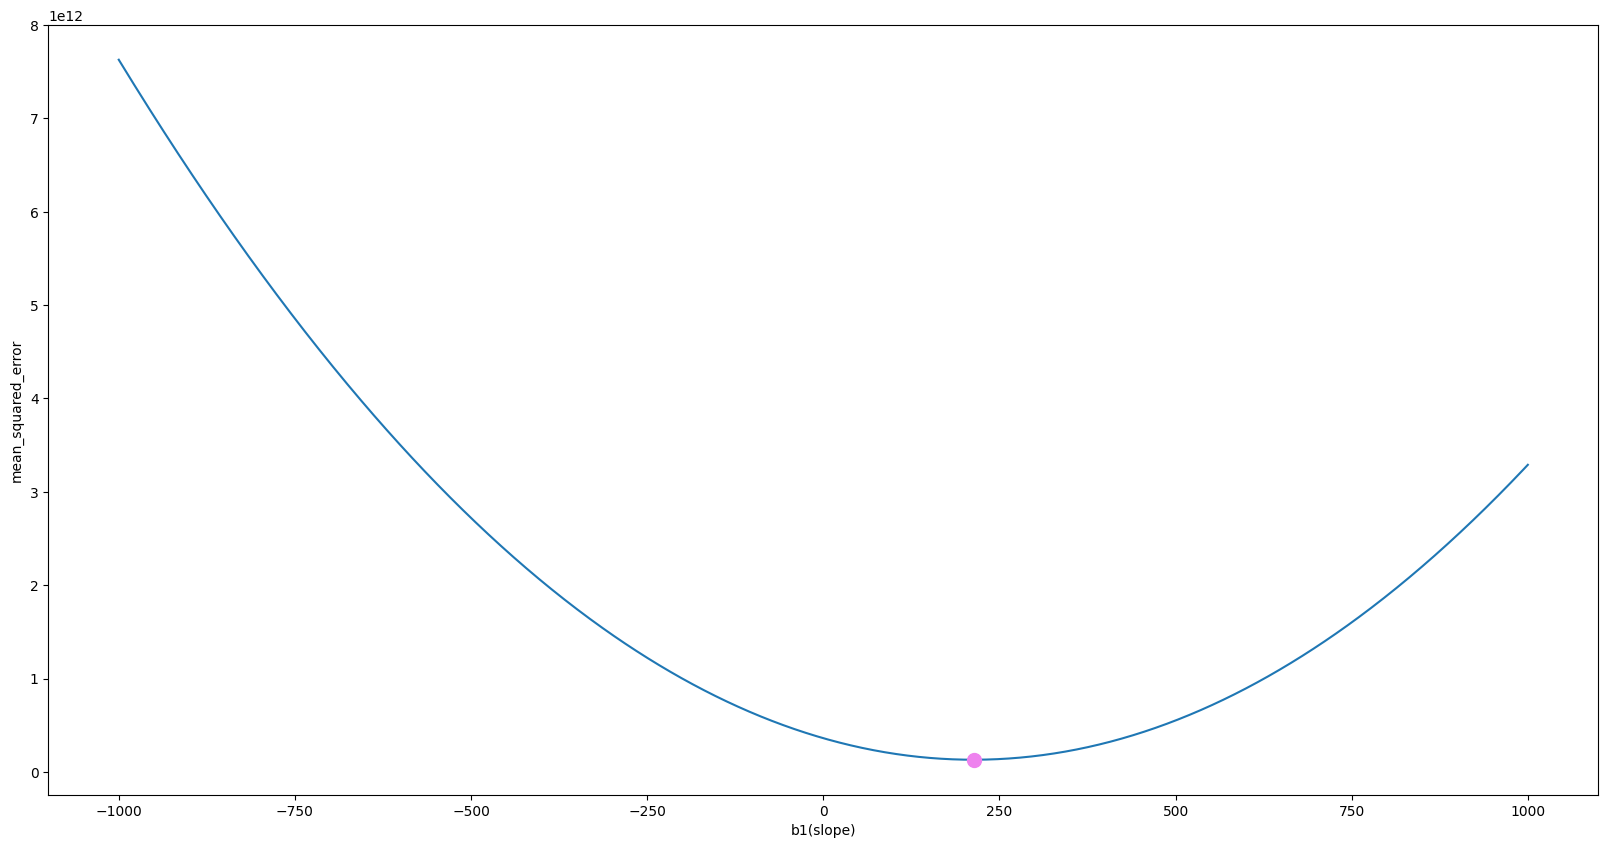

In [40]:
#b)
liniar_space = np.linspace(-1000, 1000, 1000)

result = [cost(predict(np.array([b]), X), y) for b in liniar_space]


fig, ax =plt.subplots(figsize=(20, 10))
ax.plot(liniar_space, result)


ax.set_xlabel('b1(slope)')
ax.set_ylabel('mean_squared_error')

min_point = np.argmin(result)
x_min = liniar_space[min_point]
y_min = result[min_point]

ax.plot(x_min, y_min, 'o', markersize=10, color='violet')

print(f"Minimal point:({x_min}, {y_min}) ")



Note: I computed 1000 values of the cost function for various 'b' values within the range of -1000 to 1000. Identifying the 'b' that minimizes the cost function, I marked this optimal value with a purple dot. The value of this minimizing point is (213.2132132132133, 130568575551.22713).

Text(0, 0.5, 'price')

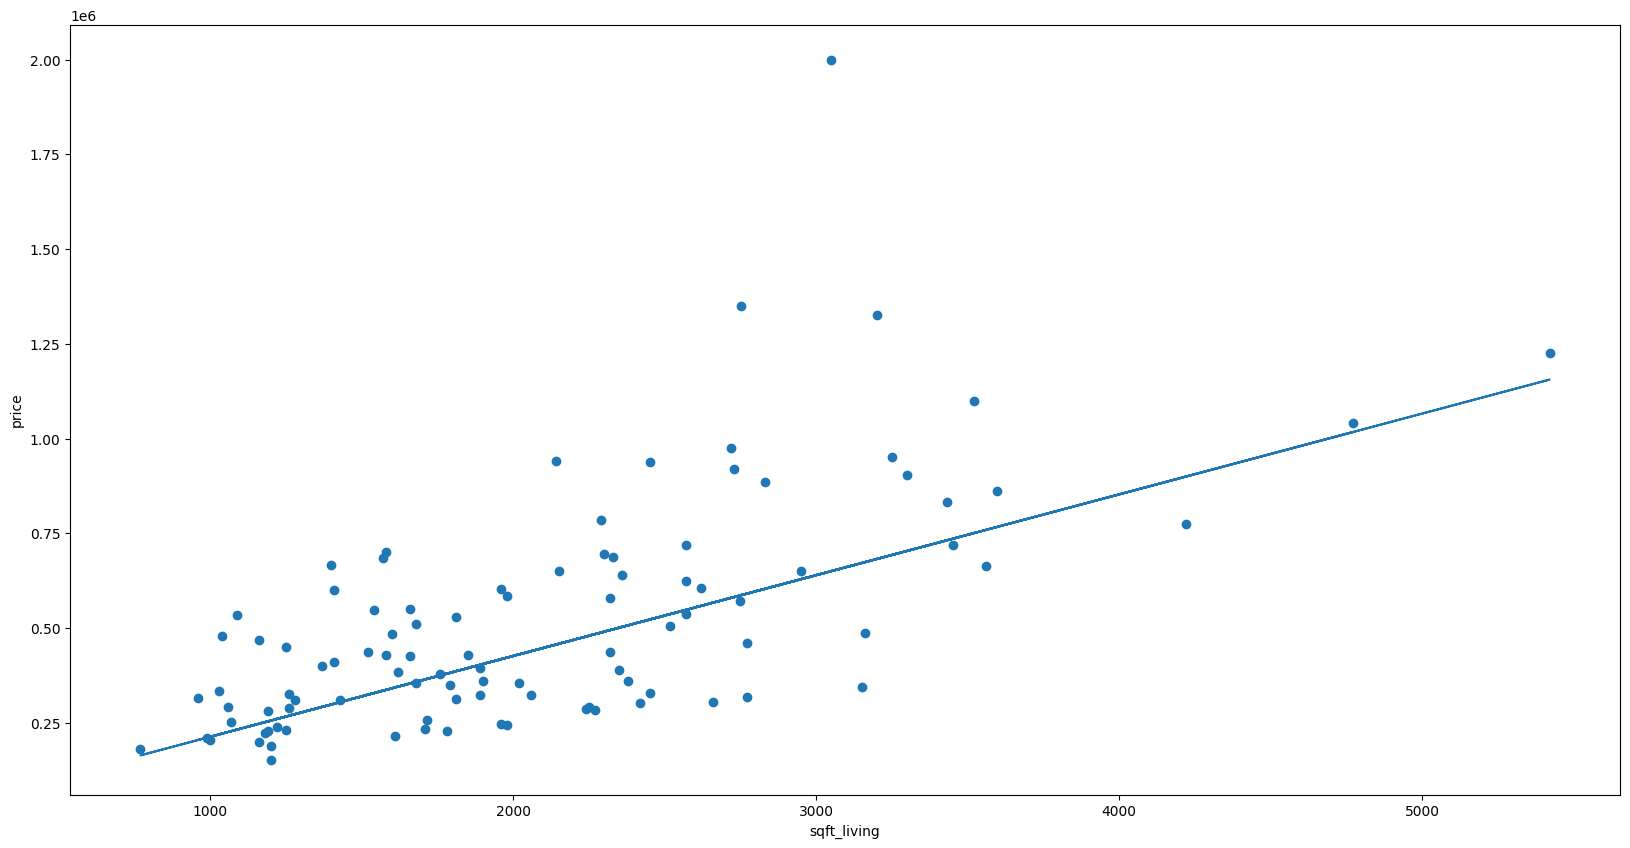

In [41]:
fig, ax = plt.subplots(figsize=(20, 10))

ax.scatter(X, y)
ax.plot(X, X*x_min)
ax.set_xlabel('sqft_living')
ax.set_ylabel('price')

Note: Subsequently, using this identified point, I plotted the regression line, which minimizes the cumulative distance to all points. It's important to note that I achieved these results without utilizing a fit function from the sklearn library.

# 2. Bias

The line above has limitation of crossing point (0,0). As on our data it doesn't seem harmful, let us check how our model would perform, if all $y$ were shifted by some constant. The interpretation is as follows: the goverment has imposed a new tax in the set amount of 1 million dollar on buying new houses.

Minimal point:(623.6236236236239, 423809631737.8764) 


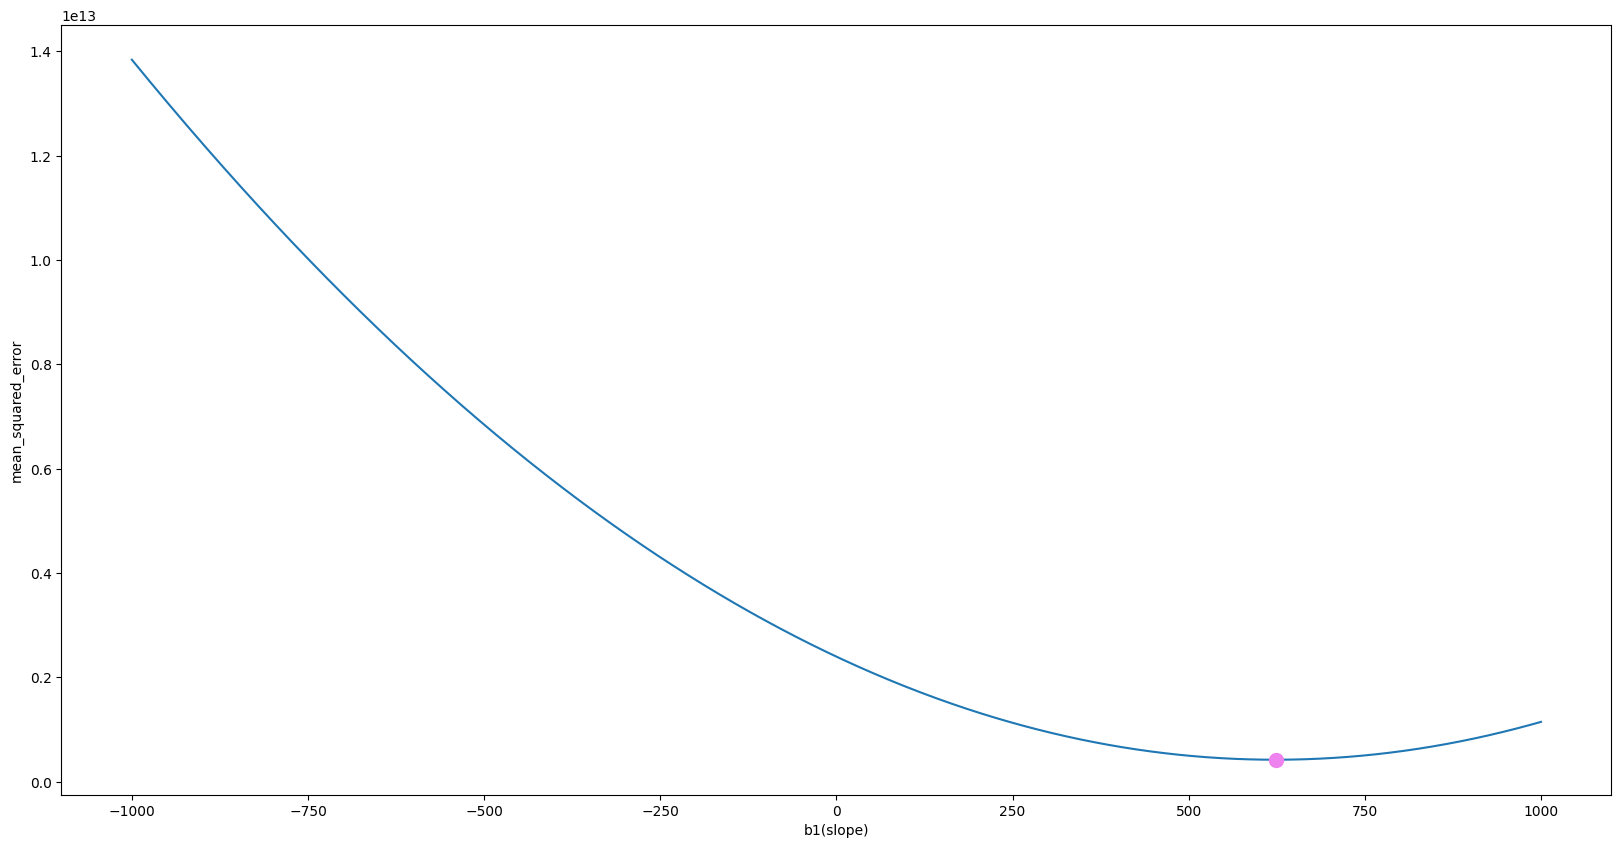

In [42]:
tax = 1e6
new_y = y+tax

result = [cost(predict(np.array([b]), X), new_y) for b in liniar_space]


fig, ax =plt.subplots(figsize=(20, 10))
ax.plot(liniar_space, result)

ax.set_xlabel('b1(slope)')
ax.set_ylabel('mean_squared_error')

min_point = np.argmin(result)
x_min = liniar_space[min_point]
y_min = result[min_point]

ax.plot(x_min, y_min, 'o', markersize=10, color='violet')

print(f"Minimal point:({x_min}, {y_min}) ")

Note: The outcomes of the cost function for b values underwent alterations following the adjustment of the 'y' vector by tax(1e6). Notably, the minimizing point shifted in response to this adjustment. New minimizing point value is (623.6236236236239, 423809631737.8764).

Text(0, 0.5, 'price')

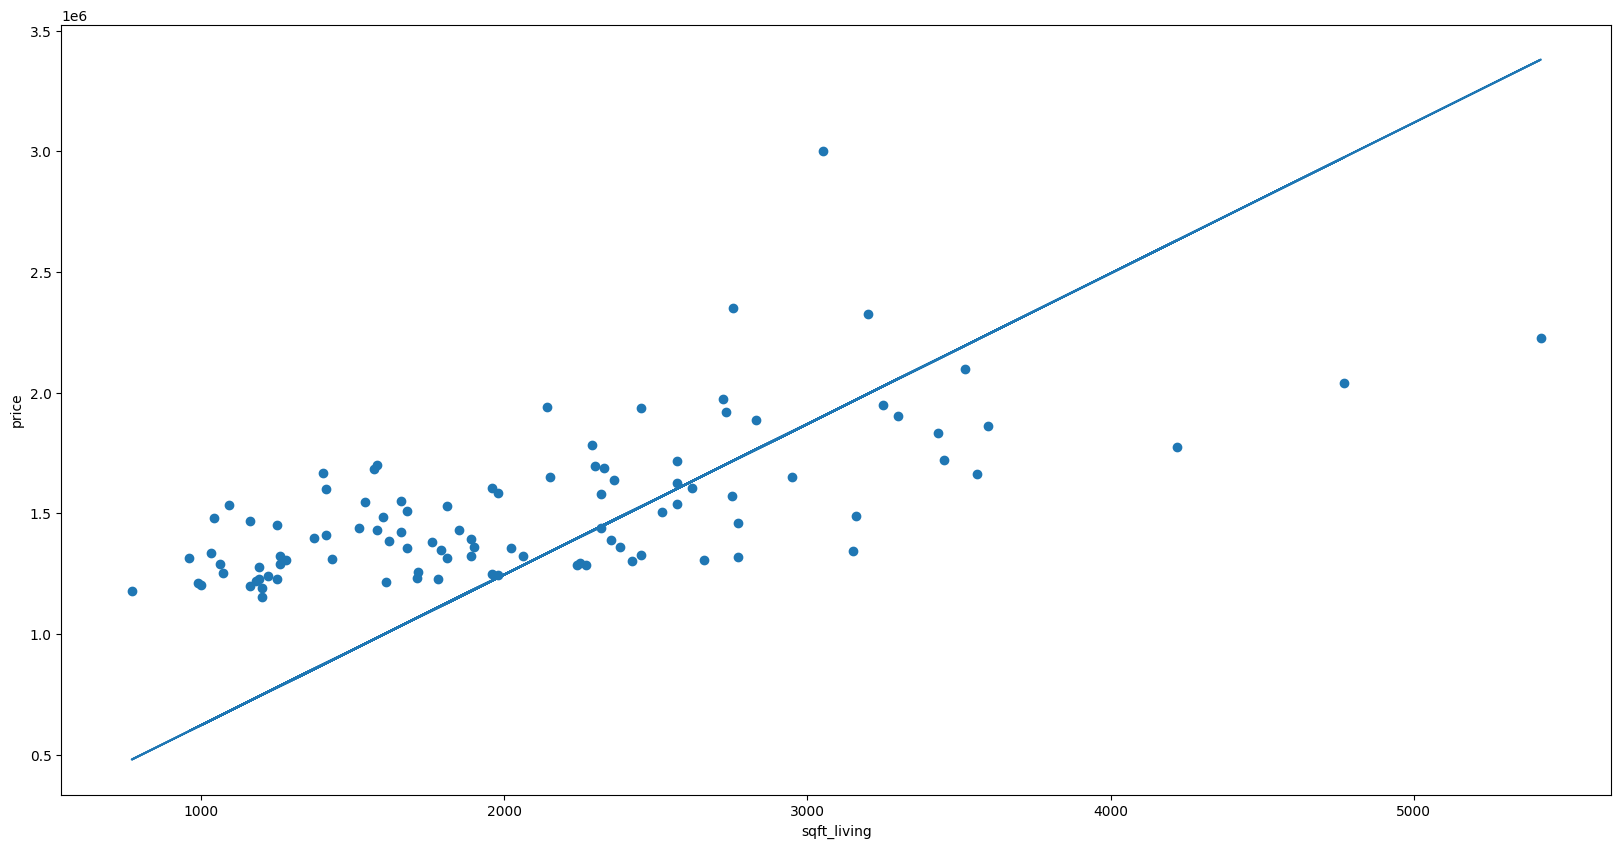

In [43]:
fig, ax = plt.subplots(figsize=(20, 10))

ax.scatter(X, new_y)
ax.plot(X, X*x_min)
ax.set_xlabel('sqft_living')
ax.set_ylabel('price')

Note: In this exercise I replicated the procedure, albeit with a modification—increasing the price of each apartment by 1 million dollars. Notably, as the price ascends, the optimal coefficient b also experiences an increase. A glance at the Y-axis reveals larger error values corresponding to the amplified prices.

As we can see, for the best slope the error has grown almost by the factor of four. In addition we clearly see, that what limits us is indeed the constraint of all lines crossing point $(0,0)$.   

There are two basic solutions of this problem. One of them is centring of the data, that is substracting overall mean from all the values of given feature (or regressand).  

The other is adding bias term, which in this context (different than context discussed during the lectures!) may be understood as constant term in line equation. We simulate adding constant term to result of each prediction by appending artificial feature consisting of ones to **$X$** matrix and additional term to **$b$** vector.

## Exercise 2
a) Add bias column to the **$X$** matrix.  
b) Make the code below compatible with functions that you've created so far.

In [44]:
#a)
X = np.c_[X, np.ones(X.shape[0])]
X.shape

(100, 2)

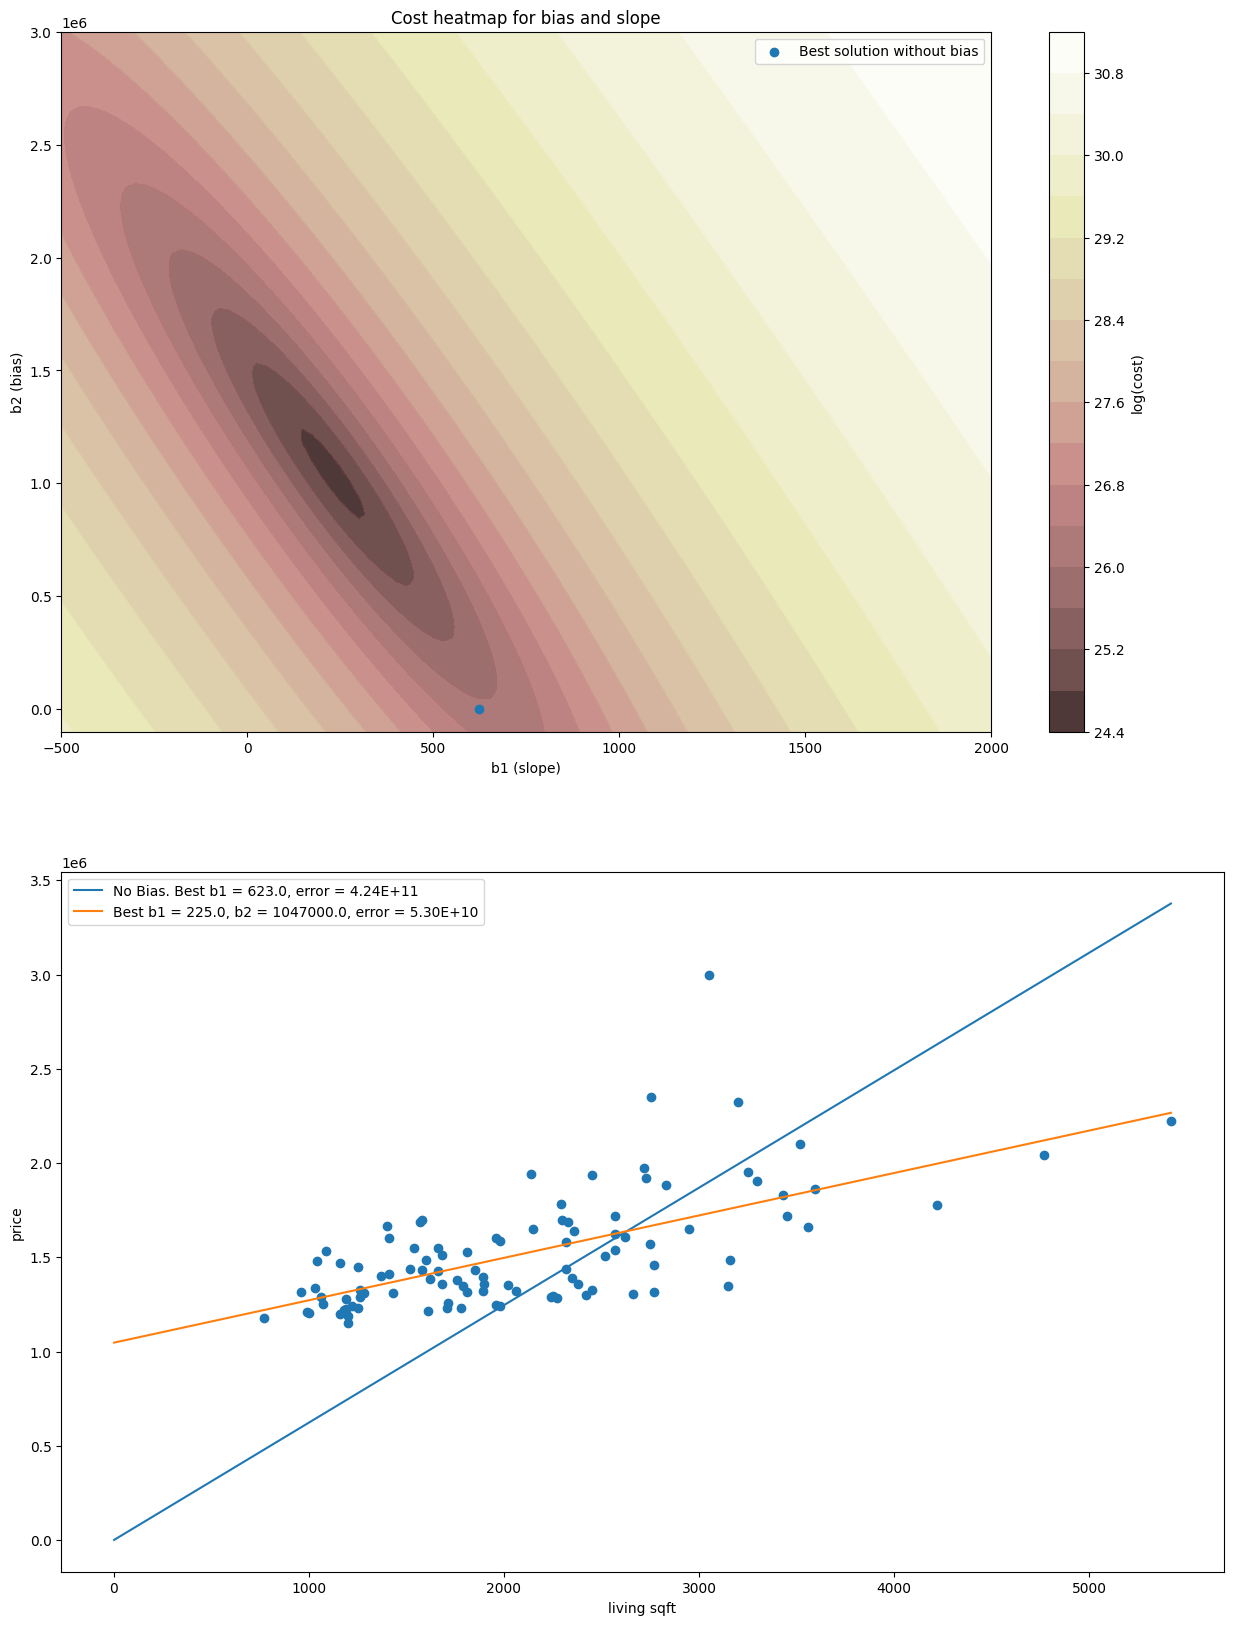

In [45]:
#b)
y_shifted = y+1e6

#No Bias Part
b_arr = [np.array(b1) for b1 in np.linspace(-1000, 1000, num=2001)]
cost_arr = [cost(predict(np.array([b]), X[:,0].reshape(-1,1)), y_shifted) for b in b_arr]
best_b1 = b_arr[np.argmin(cost_arr)]


#Bias Part
nb_of_bs = 101 # compute the cost nb_of_bs times in each dimension
b1 = np.linspace(-500, 2000, num=nb_of_bs) # slope coefficient
b2 = np.linspace(-1e5, 3e6, num=nb_of_bs) # bias
b_x, b_y = np.meshgrid(b1, b2) # generate grid
cost_arr_2d = np.zeros((nb_of_bs, nb_of_bs)) # initialize cost matrix

# Fill the cost matrix for each combination of coefficients
for i in range(nb_of_bs):
    for j in range(nb_of_bs):
        cost_arr_2d[i,j] = cost(predict(np.array([[b_x[i,j]], [b_y[i,j]]]), X) , y_shifted)


plt.figure(figsize=(15,20)) 
        
plt.subplot(2,1,1)
plt.title("Cost heatmap for bias and slope")

plt.contourf(b_x, b_y, np.log(cost_arr_2d), 20, alpha=0.9, cmap=cm.pink)
cbar = plt.colorbar()
plt.scatter(best_b1, 0, label = "Best solution without bias")
cbar.ax.set_ylabel('log(cost)')
plt.xlabel("b1 (slope)")
plt.ylabel("b2 (bias)")
plt.legend()

plt.subplot(2,1,2)

plt.scatter(X.T[0], y_shifted)
plt.xlabel("living sqft")
plt.ylabel("price")

x_model = np.linspace(np.min(X), np.max(X), 1000)
y_model = best_b1*x_model
plt.plot(x_model, y_model, label='No Bias. Best b1 = {}, error = {:.2E}'.format(best_b1, cost_arr[np.argmin(cost_arr)]))

best_b1_2d_ind, best_b2_2d_ind = np.unravel_index(cost_arr_2d.argmin(), cost_arr_2d.shape)
best_b1 = b_x[best_b1_2d_ind,best_b2_2d_ind]
best_b2 = b_y[best_b1_2d_ind,best_b2_2d_ind]

y_model = best_b1*x_model + best_b2
plt.plot(x_model, y_model, label='Best b1 = {}, b2 = {}, error = {:.2E}'.format(best_b1, best_b2, cost_arr_2d[best_b1_2d_ind,best_b2_2d_ind]))

plt.legend()

plt.show()

Note: In this exercise I wanted to improve our model by introducing a bias term. I accomplished this by including a new column in our features matrix with ones and a variable b2 for bias (while b1 still represents the slope). Afterward, I created a 2D array of costs for different b1 and b2 combinations and visualized it with a heatmap.


By identifying the best b1 and b2 values, I created a more efficient regression line. This improvement is notable because the line is no longer restricted to passing through the point (0,0)

**Adding bias improved error by three orders of magnitude. Not bad!**

# 3. Standardization

In order to improve performance of many machine learning algorithms, the value standardization is applied. It makes the values of each feature in the data have zero-mean and unit-variance. It is achieved by substracting from each value $x$ the overall mean $\bar{x}$, and then dividing it by feature's standard deviation ${\sigma}$:

$$x' = \frac{x - \bar{x}}{\sigma}. $$

It is important to remember, that bias column should not be standardize!

## Exercise 3
a) Implement function standardize(), which standardize the feature matrix and returns it together with two vectors containing original features' means and standard deviations.  
b) Implement function destandardize(), which restores the original data given standardized feature matrix X and vectors containing original features' means and standard deviations.  
c) Plot original $X,y$ data. Then plot it after standardization. Then plot it after destandardisation.

In [46]:
#a)
def standardize(X):
    means = np.mean(X, axis=0)
    sds = np.std(X, axis=0)
    return ((X-means)/sds, means, sds)

#b)
def destandardize(X, means, sds):
    return (X*sds) + means


#short test:
W = [[1,2,3],[2,5,4],[3,4,5],[4,5,7]]
standardize(W)

#Hint: with np.mean and np.std first function is three lines long. The second is one-liner.

(array([[-1.34164079, -1.63299316, -1.18321596],
        [-0.4472136 ,  0.81649658, -0.50709255],
        [ 0.4472136 ,  0.        ,  0.16903085],
        [ 1.34164079,  0.81649658,  1.52127766]]),
 array([2.5 , 4.  , 4.75]),
 array([1.11803399, 1.22474487, 1.47901995]))

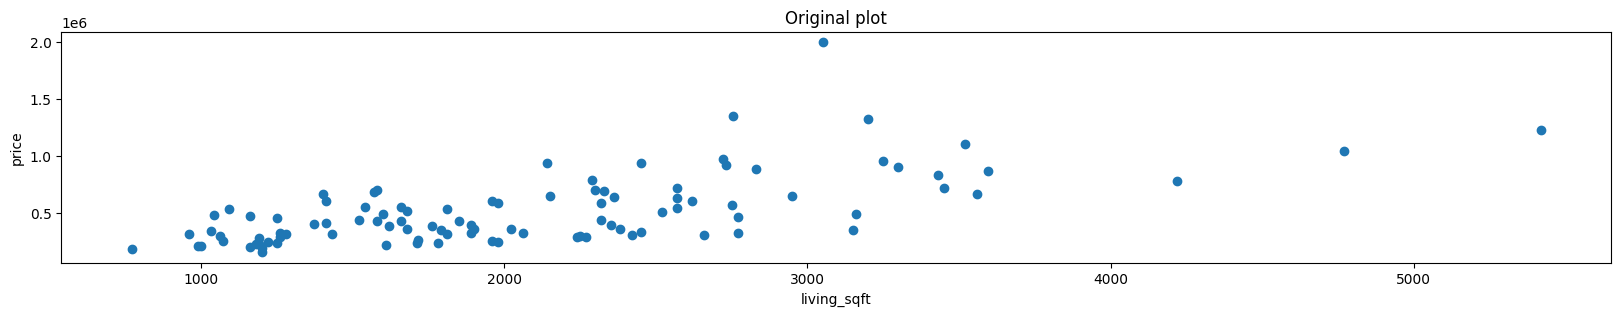

In [47]:
#c)

fig, ax = plt.subplots(figsize=(20, 3))

ax.set_xlabel('living_sqft')
ax.set_ylabel('price')

ax.set_title("Original plot")
ax.scatter(X[:,0].reshape(-1, 1), y)

plt.show()


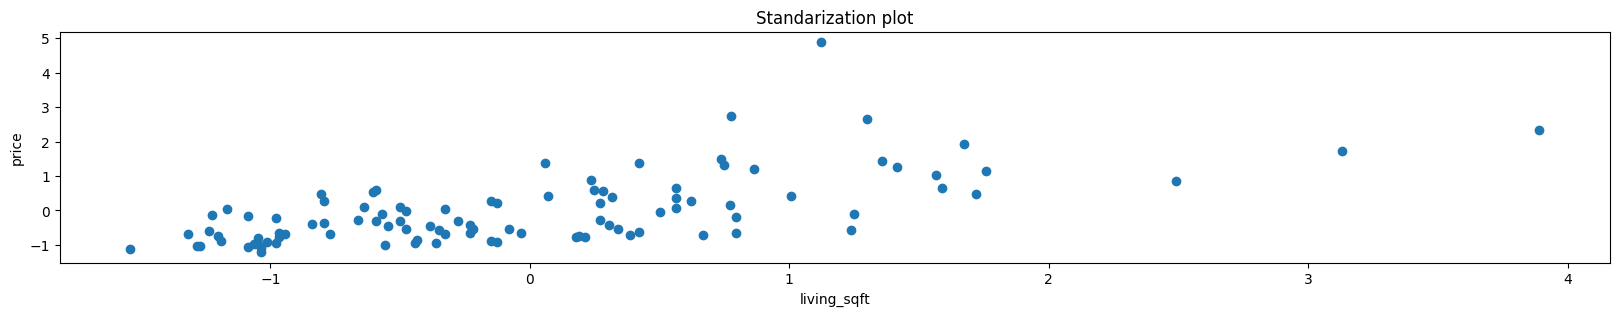

In [48]:
fig, ax = plt.subplots(figsize=(20, 3))

ax.set_xlabel('living_sqft')
ax.set_ylabel('price')

ax.set_title("Standarization plot")


std_x, x_means, x_sds = standardize(X[:, 0].reshape(-1, 1))
std_y, y_means, y_sds = standardize(y)

ax.scatter(std_x, std_y)

plt.show()

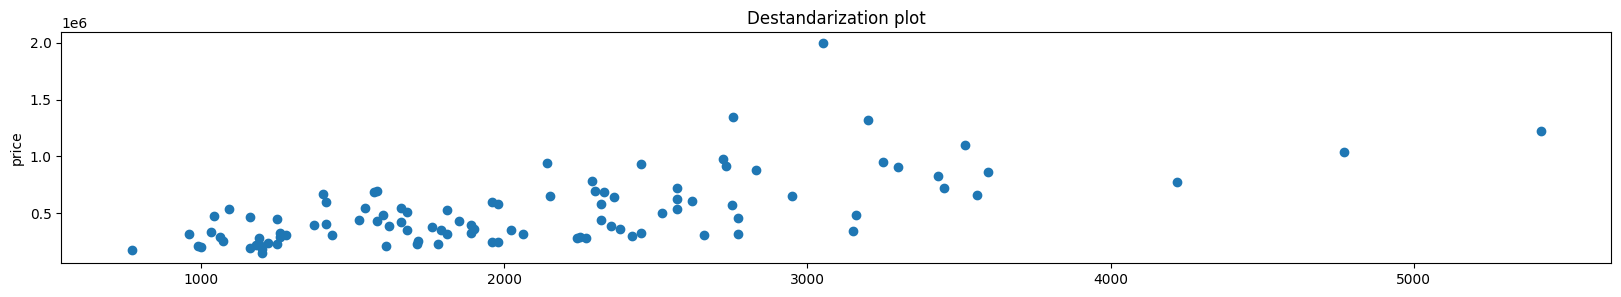

In [49]:
fig, ax = plt.subplots(figsize=(20, 3))

ax.set_xlabel('')
ax.set_ylabel('price')

ax.set_title("Destandarization plot")


destd_x = destandardize(std_x, x_means, x_sds)
destd_y = destandardize(std_y, y_means, y_sds)

ax.scatter(destd_x, destd_y)

plt.show()

Note: In this exercise, we created a standardization function based on the theoretical introduction. After standardization, we observed that the data values became much smaller compared to the original dataset. The fact that the original and destandardized data are identical confirms the accuracy of our destandardization function.



Data standardization becomes crucial when features in the input dataset have substantial differences in their ranges or are measured in different units.

## 3. Gradient Descent Method

In previous examples we were determining the approximate value of optimal vector **$b$** by finding best arguments from pre-defined grid. This solution is neither fast nor precise. Although in theory it is possible to find vector **$b$** analytically, it requires inversing large matrices, as the close form for **$b$** is $b=(X^\mathsf{T}X)^{-1}X^\mathsf{T}y$.

The other approach is to find approximation of **$b$** is Gradient Descent Method. Let us recall that for function $f: \ R^n \to R$ a gradient 

$$\nabla f =  \begin{bmatrix} \frac{\partial f}{\partial x_1} \\ \vdots \\ \frac{\partial f}{\partial x_n} \end{bmatrix}$$

is the direction of the biggest increase of $f$. Using linearity of derivative, $-\nabla f$ is the direction of the biggest decrease. Gradient Descent Method is based on iterative moving in the direction opposite to gradient, and by these means approaching the minimum.

#### GDM step by step:  
1. Choose starting point $x_{0}$ and parameters: *learning rate* and *precision*,
2. Update $x_{i+1} = x_{i} - \nabla f(x_{i})\cdot lr$, where $lr$ is learning rate parameter,
3. If $(|\nabla f(x_{i})| < precision)$, end. If not, go back to point 2.

One of many limitations of GMD may be knowledge of function's gradient. Luckily for us, it is quite easy in case of linear regression with mean square error cost function. We have

$$ \nabla f_{y}(b) = \nabla\dfrac{|Xb−y|^2}{n} = \dfrac{2X^\mathsf{T}(Xb−y)}{n}.  $$

## Exercise 4
a) Create functions: *gradient()* which computes gradient for linear regresion and *gradient_descent_step()* which returns new vector **b** being the result of one GDM step.  

b) Take **$X$** consisting of *sqft_living* together with bias column. Set **$y$** as price. Standardize both **$X$** (without bias) and **$y$**. Plot a heatmap showing dependence of cost function's value on vector **$b$**. Mark first 5 steps of gradient descent with *learning rate* = $0.2$, starting from **$b =  \begin{bmatrix} 3 \\ 2 \end{bmatrix}$**. Experiment with other *learning rates*.  

c) Take **$X$** consisting of *sqft_living* and *sqft_lot*. Set **$y$** as price. Standardize both **$X$** and **$y$**. Plot a heatmap showing dependence of cost function's value on vector **$b$**. Mark first 5 steps of gradient descent with *learning rate* = $0.2$, starting from **$b =  \begin{bmatrix} 3 \\ 1 \end{bmatrix}$**. Experiment with other *learning rates*.  

d) Try to redo above points without standarization. How can you explain such results?


In [50]:
#a)

def gradient(b, X, y):
    return ((np.matmul(2*X.T, np.matmul(X, b) - y))/len(y))

def gradient_descent_step(b, X, y, lr):
    return b - gradient(b, X, y) * lr


#short test:
test_b = np.array([[1],[1],[1]])
test_X = np.array([[1,2,3],[2,5,4],[3,4,5],[4,5,7]])
test_y = np.array([[1],[2],[3],[4]])

print(gradient(test_b, test_X, test_y))
print(gradient_descent_step(test_b, test_X, test_y, 0.1))

[[49. ]
 [75.5]
 [90. ]]
[[-3.9 ]
 [-6.55]
 [-8.  ]]


/tmp/ipykernel_9914/2947763706.py:5: RuntimeWarning: invalid value encountered in divide
  return ((X-means)/sds, means, sds)


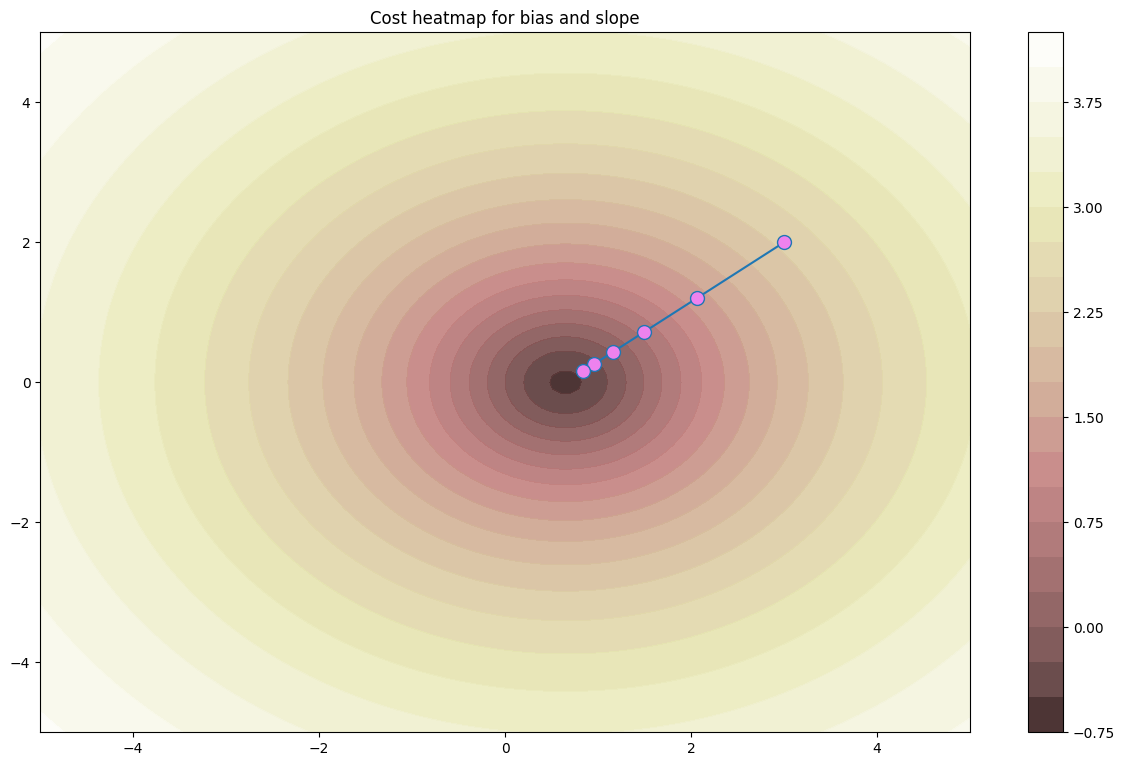

In [51]:
#b)

#Bias Part
nb_of_bs = 101 # compute the cost nb_of_bs times in each dimension
b1 = np.linspace(-5, 5, num=nb_of_bs) # slope coefficient
b2 = np.linspace(-5, 5, num=nb_of_bs) # bias
b_x, b_y = np.meshgrid(b1, b2) # generate grid
cost_arr_2d = np.zeros((nb_of_bs, nb_of_bs)) # initialize cost matrix

X_std = X.copy()
X_std[:, 0] = standardize(X_std)[0][:, 0]
y_std = standardize(y)[0]

# Fill the cost matrix for each combination of coefficients
for i in range(nb_of_bs):
    for j in range(nb_of_bs):
        cost_arr_2d[i,j] = cost(predict(np.array([[b_x[i,j]], [b_y[i,j]]]), X_std) , y_std)
b = np.array([[3], [2]])
lr = 0.2
gradient_steps = [b]

for i in range(5):
    b = gradient_descent_step(b, X_std, y_std, lr)
    gradient_steps.append(b)

gradient_steps = np.array(gradient_steps)

plt.figure(figsize=(15,20)) 
        
plt.subplot(2,1,1)
plt.title("Cost heatmap for bias and slope")

plt.contourf(b_x, b_y, np.log(cost_arr_2d), 20, alpha=0.9, cmap=cm.pink)
cbar = plt.colorbar()
plt.plot(gradient_steps[:, 0], gradient_steps[:, 1], marker='o', ms=10, mfc='violet')



Notes: In this exercise, we've adopted the gradient descent method to find the best values for b1 and b2. This approach is more efficient than seeking a numerical solution, which could be computationally expensive or even impractical.


The learning rate plays a crucial role, because it determines how quickly we follow the gradient. It's important to strike a balance, avoiding a rate that's too small, as it would require numerous steps to find the optimal solution. 


Conversely, an excessively large learning rate could lead to oversized steps in each iteration, hindering the discovery of a valid solution.

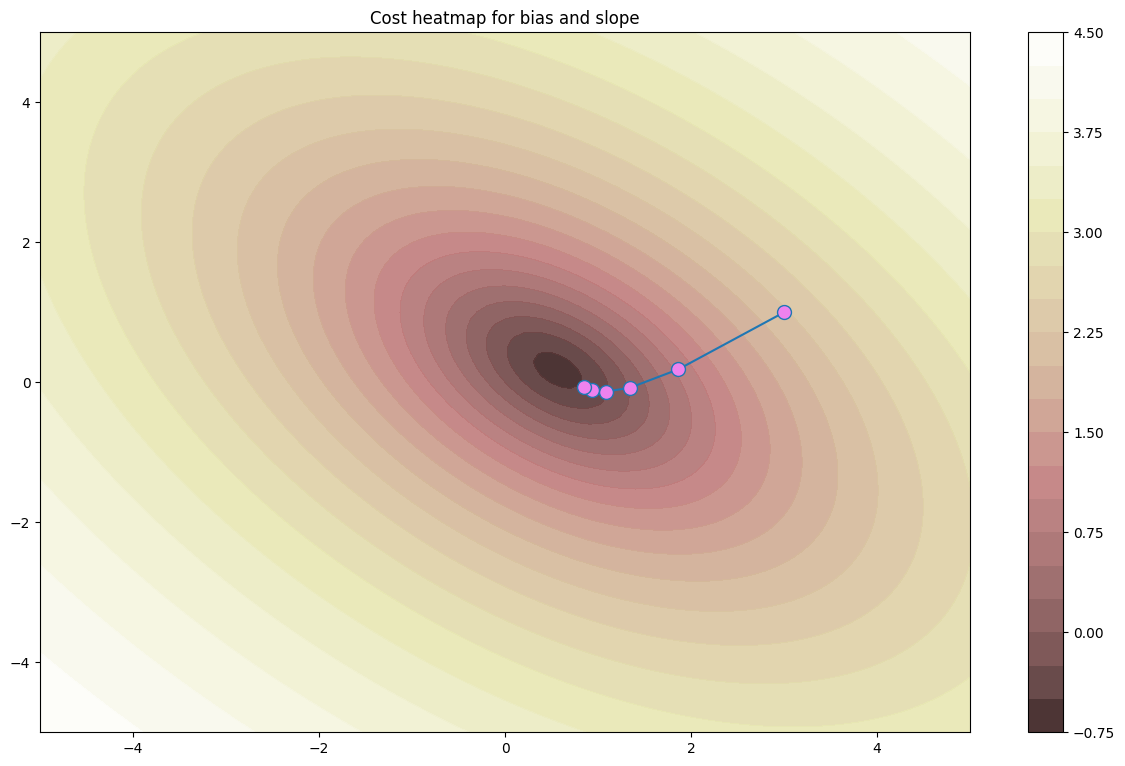

In [52]:
#c)
#Bias Part
X = house_df[['sqft_living', 'sqft_lot']].values.reshape(-1, 2)[:100]
y = house_df['price'].values.reshape(-1, 1)[:100]

nb_of_bs = 101 # compute the cost nb_of_bs times in each dimension
b1 = np.linspace(-5, 5, num=nb_of_bs) # slope coefficient
b2 = np.linspace(-5, 5, num=nb_of_bs) # bias
b_x, b_y = np.meshgrid(b1, b2) # generate grid
cost_arr_2d = np.zeros((nb_of_bs, nb_of_bs)) # initialize cost matrix

X_std = standardize(X)[0]
y_std = standardize(y)[0]

# Fill the cost matrix for each combination of coefficients
for i in range(nb_of_bs):
    for j in range(nb_of_bs):
        cost_arr_2d[i,j] = cost(predict(np.array([[b_x[i,j]], [b_y[i,j]]]), X_std) , y_std)
b = np.array([[3], [1]])
lr = 0.2
gradient_steps = [b]

for i in range(5):
    b = gradient_descent_step(b, X_std, y_std, lr)
    gradient_steps.append(b)

gradient_steps = np.array(gradient_steps)

plt.figure(figsize=(15,20)) 
        
plt.subplot(2,1,1)
plt.title("Cost heatmap for bias and slope")

plt.contourf(b_x, b_y, np.log(cost_arr_2d), 20, alpha=0.9, cmap=cm.pink)
cbar = plt.colorbar()
plt.plot(gradient_steps[:, 0], gradient_steps[:, 1], marker='o', ms=10, mfc='violet')


Note: Modifying the feature set leads to a distinct heatmap shape, altered gradient steps, and ultimately a different solution. Standardization enables us to compare these results with the previous ones, providing valuable insights

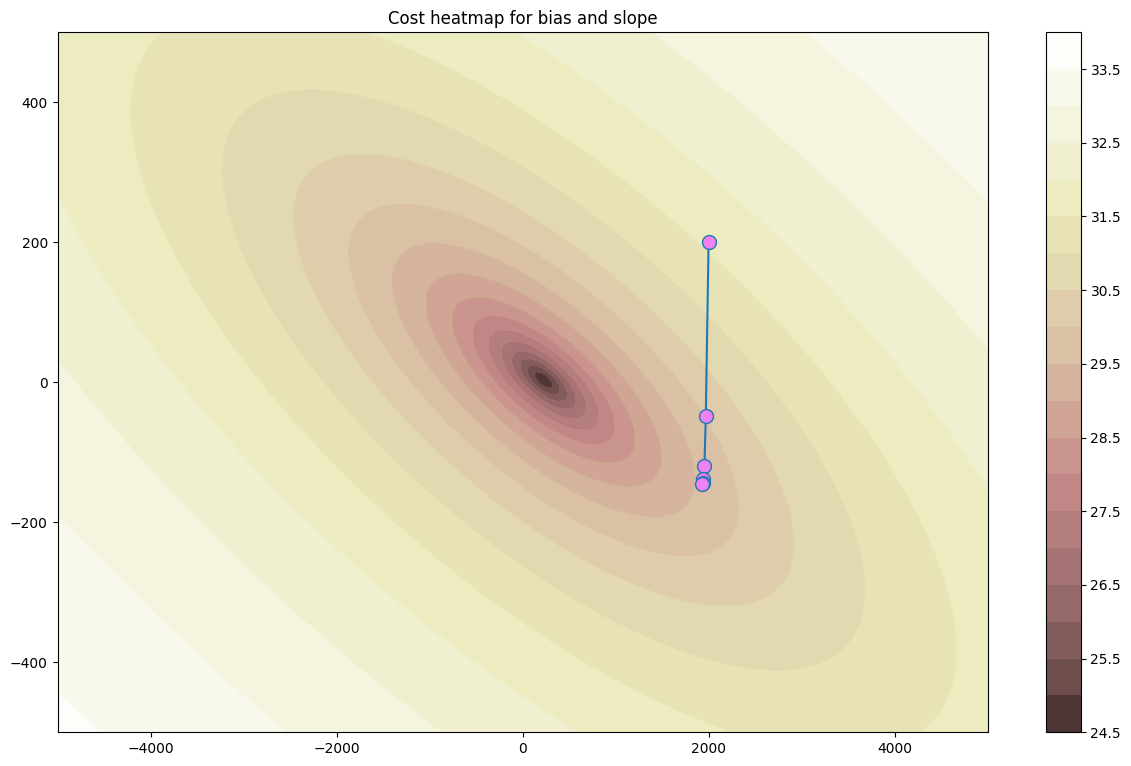

In [64]:
#d)
#Bias Part
X = house_df[['sqft_living', 'sqft_lot']].values.reshape(-1, 2)[:100]
y = house_df['price'].values.reshape(-1, 1)[:100]

nb_of_bs = 201 # compute the cost nb_of_bs times in each dimension
b1 = np.linspace(-5e3, 5e3, num=nb_of_bs) # slope coefficient
b2 = np.linspace(-5e2, 5e2, num=nb_of_bs) # bias
b_x, b_y = np.meshgrid(b1, b2) # generate grid
cost_arr_2d = np.zeros((nb_of_bs, nb_of_bs)) # initialize cost matrix

# Fill the cost matrix for each combination of coefficients
for i in range(nb_of_bs):
    for j in range(nb_of_bs):
        cost_arr_2d[i,j] = cost(predict(np.array([[b_x[i,j]], [b_y[i,j]]]), X) , y)
b = np.array([[2000], [200]])
lr = 0.000000001
gradient_steps = [b]

for i in range(5):
    b = gradient_descent_step(b, X, y, lr)
    gradient_steps.append(b)

gradient_steps = np.array(gradient_steps)

plt.figure(figsize=(15,20)) 
        
plt.subplot(2,1,1)
plt.title("Cost heatmap for bias and slope")

plt.contourf(b_x, b_y, np.log(cost_arr_2d), 20, alpha=0.9, cmap=cm.pink)
cbar = plt.colorbar()
plt.plot(gradient_steps[:, 0], gradient_steps[:, 1], marker='o', ms=10, mfc='violet')


Note: Standardization is crucial when comparing the impact of different features because it ensures they share the same scale, with a mean of zero and a standard deviation of one. Without standardization, selecting the right range of b1 and b2 values for a meaningful plot becomes more challenging.

In the absence of standardization, some feature values can dominate the final model results. For instance, `sqft_lot` might be significantly larger than `sqft_living.` 

Additioally, without standardization, experimenting with different learning rates becomes more necessary. As seen above, using a learning rate of 1e-9 indicates an issue, signaling the need for a change in our approach to problem-solving.

The entire process becomes more unstable without standardization, making it notably more challenging to find a satisfactory solution.